E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!


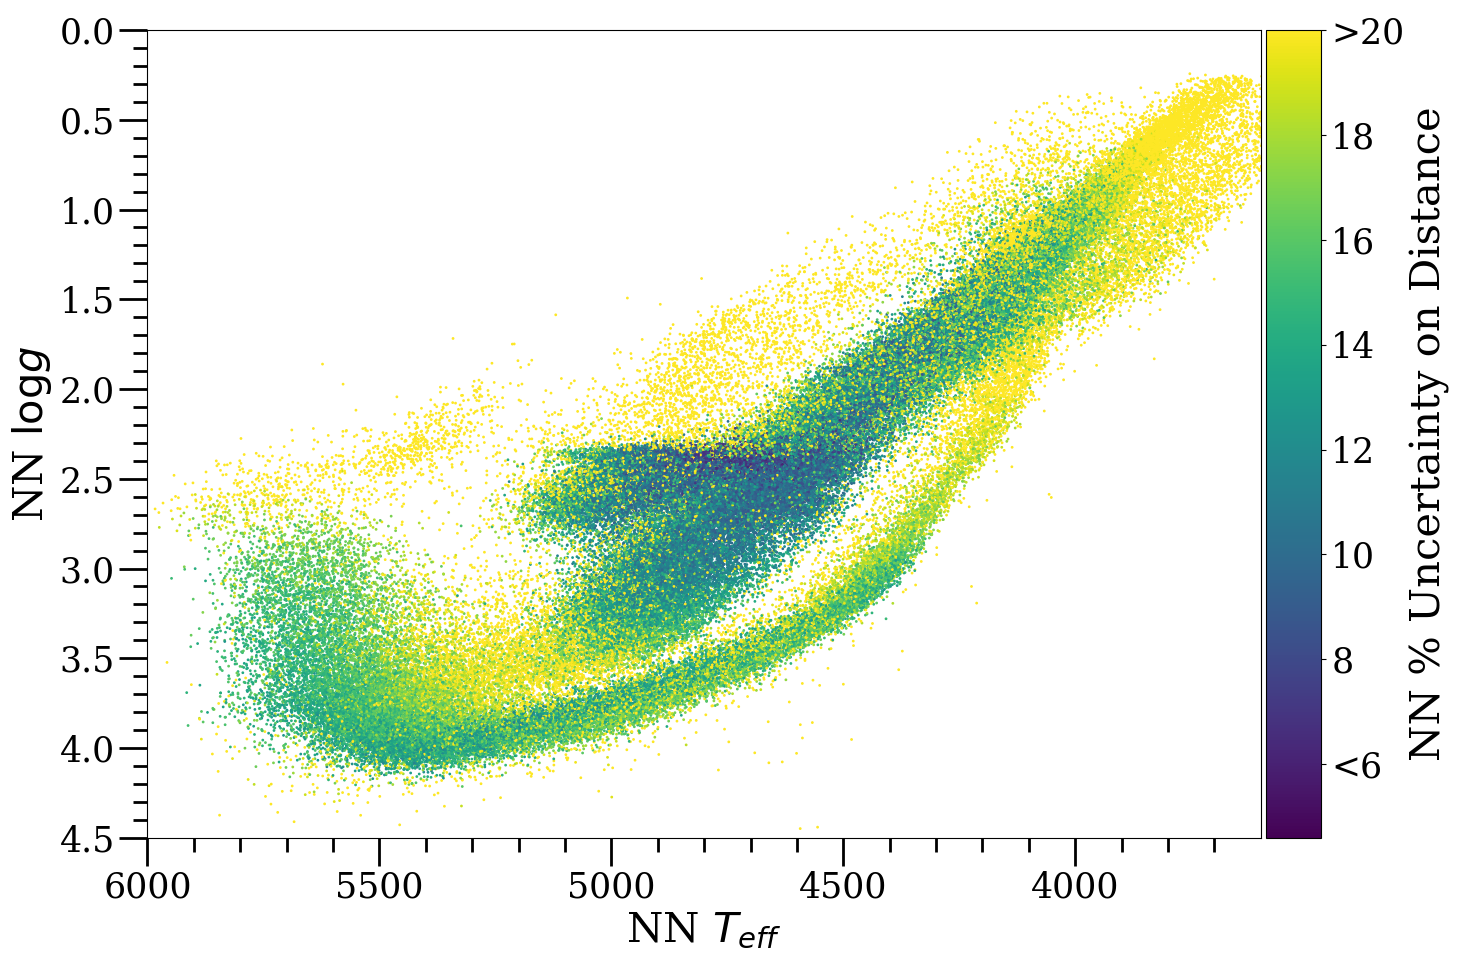

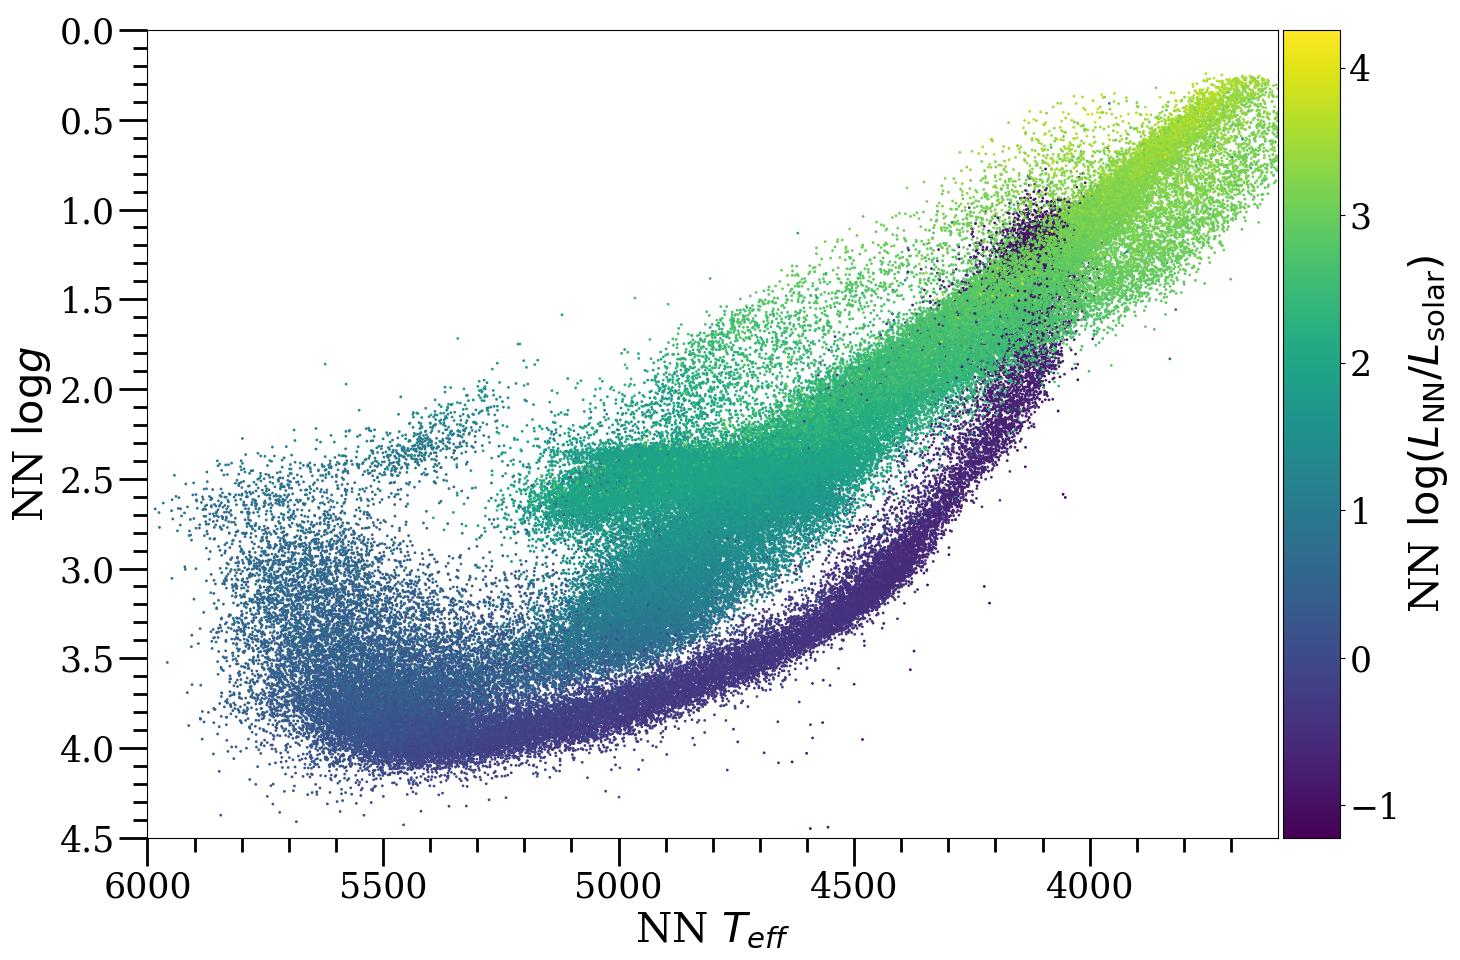

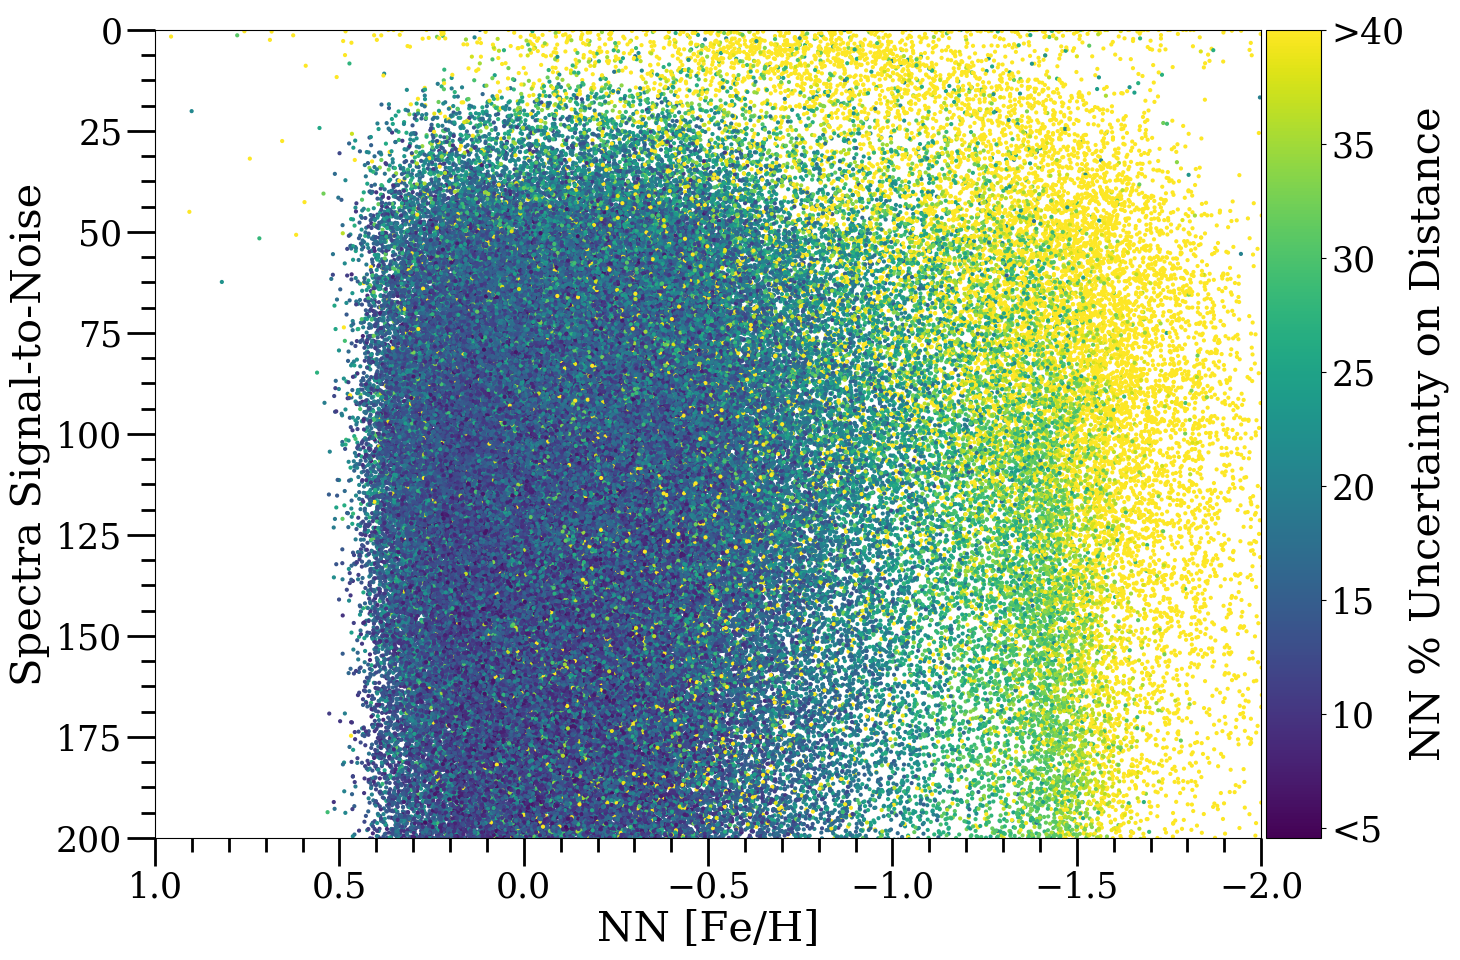

In [18]:
%matplotlib inline
import numpy as np
import pylab as plt
from astropy.io import fits
from astroNN.apogee import allstar
from astroNN.gaia import fakemag_to_logsol
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('font', **{'family': 'serif', 'weight': 'medium', 'size': 20})

f_dist = fits.getdata("apogee_dr14_nn_dist_cuts_005.fits")
f_chem = fits.getdata("astroNN_apogee_dr14_catalog.fits")
allstar_dr14 = fits.getdata(allstar(dr=14))

nn_teff = f_chem['astroNN'][:, 0]
nn_teff_error = f_chem['astroNN_error'][:, 0]
nn_logg = f_chem['astroNN'][:, 1]
nn_logg_error = f_chem['astroNN_error'][:, 1]
nn_feh = f_chem['astroNN'][:, 19]
nn_feh_error = f_chem['astroNN_error'][:, 19]
dist = f_dist['pc']
fakemag = f_dist['fakemag']
dist_err = f_dist['pc_error']

good_idx = [(dist / dist_err >= 1.) & (nn_teff / nn_teff_error > 1.) & (nn_logg / nn_logg_error > 1.) & 
            (nn_logg_error < 1.) & (fakemag > 0.) & (allstar_dr14['STARFLAG'] == 0)]

good_idx_feh = [(dist / dist_err >= 1.) & (nn_feh_error < 1.)]

fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(nn_teff[good_idx], nn_logg[good_idx], s=1., 
            c=np.clip(100*dist_err[good_idx]/dist[good_idx], 0, 20), rasterized=True)
plt.xlabel('NN ' + "$T_{eff}$", fontsize=30)
plt.ylabel('NN ' + '$\log{g}$', fontsize=30)
plt.xlim((3600., 6000))
plt.ylim((0.0, 4.5))
# plt.legend(loc='best', fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which='major')
plt.tick_params(width=2, length=10, which='minor')
ax.invert_xaxis()
ax.invert_yaxis()
# colorbar 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
cbar.ax.set_yticklabels(["<6", "8", "10", "12", "14", "16", "18", ">20"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN % Uncertainty on Distance", size=30)
plt.tight_layout()
# plt.savefig('logg_teff_fe_tefferr.pdf')
plt.show()

fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(nn_teff[good_idx], nn_logg[good_idx], s=1., c=fakemag_to_logsol(fakemag[good_idx]), rasterized=True)
plt.xlabel('NN ' + "$T_{eff}$", fontsize=30)
plt.ylabel('NN ' + '$\log{g}$', fontsize=30)
plt.xlim((3600., 6000))
plt.ylim((0.0, 4.5))
# plt.legend(loc='best', fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which='major')
plt.tick_params(width=2, length=10, which='minor')
ax.invert_xaxis()
ax.invert_yaxis()
# colorbar 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
# cbar.ax.set_yticklabels(["<25", *[str(r) for r in [35, 45, 55, 65]], ">75"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN " + r"$\log (L_\mathrm{NN} /L_\mathrm{solar})$", size=30)
plt.tight_layout()
# plt.savefig('logg_teff_fe_tefferr.pdf')
plt.show()

fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(nn_feh[good_idx_feh], allstar_dr14['SNR'][good_idx_feh], s=4., 
            c=np.clip(100*dist_err[good_idx_feh]/dist[good_idx_feh], 0, 40), rasterized=True)
plt.xlabel('NN [Fe/H]', fontsize=30)
plt.ylabel('Spectra Signal-to-Noise', fontsize=30)
plt.xlim((-2., 1))
plt.ylim((0, 200))
# plt.legend(loc='best', fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which='major')
plt.tick_params(width=2, length=10, which='minor')
ax.invert_xaxis()
ax.invert_yaxis()
# colorbar 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
cbar.ax.set_yticklabels(["<5", "10", "15", "20", "25", "30", "35", ">40"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN % Uncertainty on Distance", size=30)
plt.tight_layout()
# plt.savefig('logg_teff_fe_tefferr.pdf')
plt.show()

This is Gaia DR2 - APOGEE DR14 matched parallax, RA DEC in J2000, parallax in mas
Moreover, indices correspond to APOGEE allstar DR14 file
E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!


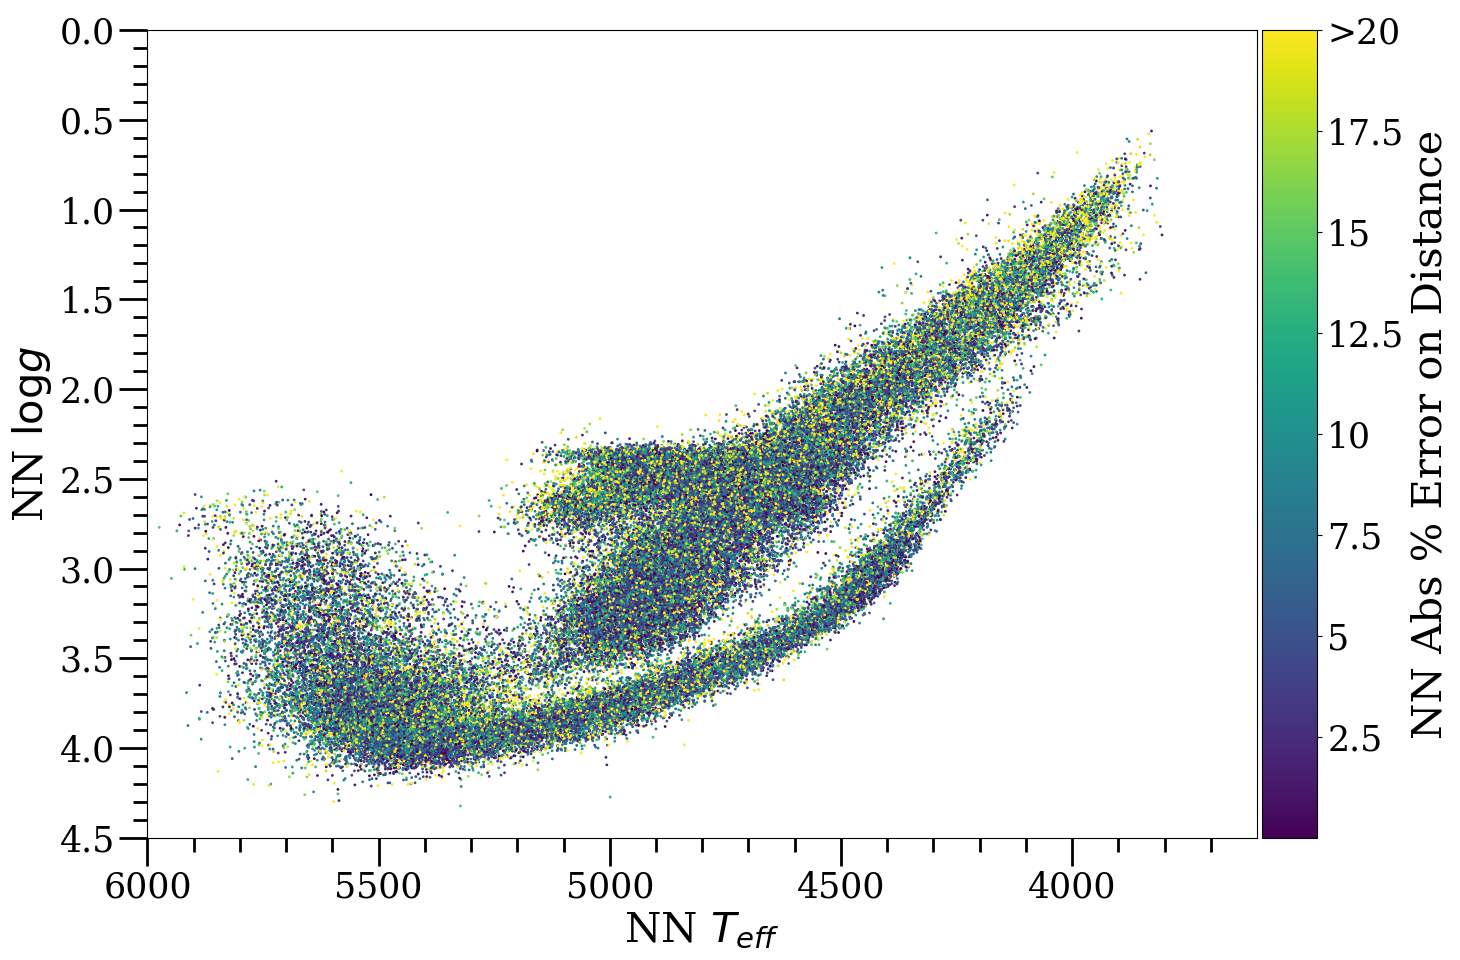

In [2]:
%matplotlib inline
import numpy as np
import pylab as plt
from astropy.io import fits
from astroNN.apogee import allstar
from astroNN.gaia import fakemag_to_logsol, gaiadr2_parallax
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('font', **{'family': 'serif', 'weight': 'medium', 'size': 20})

# remember to modify this later
ra, dec, parallax, parallax_error = gaiadr2_parallax(cuts=0.2, keepdims=True, offset=0.05)

f_dist = fits.getdata("apogee_dr14_nn_dist_cuts_005.fits")
f_chem = fits.getdata("astroNN_apogee_dr14_catalog.fits")
allstar_dr14 = fits.getdata(allstar(dr=14))

nn_teff = f_chem['astroNN'][:, 0]
nn_teff_error = f_chem['astroNN_error'][:, 0]
nn_logg = f_chem['astroNN'][:, 1]
nn_logg_error = f_chem['astroNN_error'][:, 1]
nn_feh = f_chem['astroNN'][:, 19]
nn_feh_error = f_chem['astroNN_error'][:, 19]
dist = f_dist['pc']
fakemag = f_dist['fakemag']
dist_err = f_dist['pc_error']

good_idx = [(dist / dist_err >= 5.) & (nn_teff / nn_teff_error > 1.) & (nn_logg / nn_logg_error > 1.) & 
            (nn_logg_error < 1.) & (fakemag > 0.) & (allstar_dr14['STARFLAG'] == 0) & (parallax / parallax_error > 5.)]

good_idx_feh = [(dist / dist_err >= 1.) & (nn_feh_error < 1.)]

fig = plt.figure(figsize=(15, 10), dpi=100)
ax = plt.gca()
plt.scatter(nn_teff[good_idx], nn_logg[good_idx], s=1., 
            c=np.clip(100*(np.abs(dist[good_idx] - 1000 / parallax[good_idx]) / (1000 / parallax[good_idx])), 0, 20), 
            rasterized=True)
plt.xlabel('NN ' + "$T_{eff}$", fontsize=30)
plt.ylabel('NN ' + '$\log{g}$', fontsize=30)
plt.xlim((3600., 6000))
plt.ylim((0.0, 4.5))
# plt.legend(loc='best', fontsize=25, markerscale=5)
plt.minorticks_on()
plt.tick_params(labelsize=25, width=2, length=20, which='major')
plt.tick_params(width=2, length=10, which='minor')
ax.invert_xaxis()
ax.invert_yaxis()
# colorbar 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
cbar.ax.set_yticklabels(["2.5", "5", "7.5", "10", "12.5", "15", "17.5", ">20"])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("NN Abs % Error on Distance", size=30)
plt.tight_layout()
plt.savefig('logg_teff_fe_tefferr.pdf')
plt.show()